## สนามไฟฟ้าจากประจุใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

### Line Charge
$$dq=\rho_l(r')|d\mathbf{r'}|$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

## Surface Charge
$$dq=\rho_s(r')ds$$
Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{du}\times\frac{d\mathbf{r'}}{dv}\right\|dudv$$

## HW1: E-Field inside a hollowed concentric spherical charge

จงเขียนฟังก์ชัน E(x, y, z) เพื่อคำนวณหาสนามไฟฟ้าเนื่องจากประจุแบบทรงกลมกลวงซ้อนกัน 2 ลูกที่มีจุดศูนย์กลางร่วมกัน โดยทรงกลมตัวในมีประจุ $2.5~\mu C$ และทรงกลมตัวนอกมีประจุ $-2.5~\mu C$ ทรงกลมทั้งสองมีรัศมี $1~cm$ และ $2~cm$ ตามลำดับ

![image](http://www.grandunification.com/gifs/Concentric_Spheres.gif)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad

In [10]:
x, y, z = smp.symbols('x, y, z', real=True)
theta, phi = smp.symbols('theta, phi', real=True, positive=True)

a1 = 1e-2
a2 = 2e-2
r = smp.Matrix([x, y, z])
rp1 = smp.Matrix([a1 * smp.sin(theta) * smp.cos(phi),\
                 a1 * smp.sin(theta) * smp.sin(phi),\
                 a1 * smp.cos(theta)])
rp2 = smp.Matrix([a2 * smp.sin(theta) * smp.cos(phi),\
                 a2 * smp.sin(theta) * smp.sin(phi),\
                 a2 * smp.cos(theta)])
R1 = r - rp1
R2 = r - rp2

R1

Matrix([
[x - 0.01*sin(theta)*cos(phi)],
[y - 0.01*sin(phi)*sin(theta)],
[         z - 0.01*cos(theta)]])

In [15]:
Q1 = 2.5e-6
Q2 = -Q1
rho_s1 = Q1 / (4. * pi * a1**2)
rho_s2 = Q2 / (4. * pi * a2**2)

dqdt1 = rho_s1 * smp.diff(rp1, theta).cross(smp.diff(rp1, phi)).norm().simplify()
dqdt2 = rho_s2 * smp.diff(rp2, theta).cross(smp.diff(rp2, phi)).norm().simplify()
dqdt2

-1.98943678864869e-7*Abs(sin(theta))

In [19]:
dEdt1 = dqdt1 / (4. * pi * epsilon_0) * R1 / R1.norm()**3
dEdt2 = dqdt2 / (4. * pi * epsilon_0) * R2 / R2.norm()**3
dEdt = dEdt1 + dEdt2
dEdt

Matrix([
[-1788.01661754099*(x - 0.02*sin(theta)*cos(phi))*Abs(sin(theta))/((x - 0.02*sin(theta)*cos(phi))**2 + (y - 0.02*sin(phi)*sin(theta))**2 + (z - 0.02*cos(theta))**2)**(3/2) + 1788.01661754099*(x - 0.01*sin(theta)*cos(phi))*Abs(sin(theta))/((x - 0.01*sin(theta)*cos(phi))**2 + (y - 0.01*sin(phi)*sin(theta))**2 + (z - 0.01*cos(theta))**2)**(3/2)],
[-1788.01661754099*(y - 0.02*sin(phi)*sin(theta))*Abs(sin(theta))/((x - 0.02*sin(theta)*cos(phi))**2 + (y - 0.02*sin(phi)*sin(theta))**2 + (z - 0.02*cos(theta))**2)**(3/2) + 1788.01661754099*(y - 0.01*sin(phi)*sin(theta))*Abs(sin(theta))/((x - 0.01*sin(theta)*cos(phi))**2 + (y - 0.01*sin(phi)*sin(theta))**2 + (z - 0.01*cos(theta))**2)**(3/2)],
[                  -1788.01661754099*(z - 0.02*cos(theta))*Abs(sin(theta))/((x - 0.02*sin(theta)*cos(phi))**2 + (y - 0.02*sin(phi)*sin(theta))**2 + (z - 0.02*cos(theta))**2)**(3/2) + 1788.01661754099*(z - 0.01*cos(theta))*Abs(sin(theta))/((x - 0.01*sin(theta)*cos(phi))**2 + (y - 0.01*sin(phi)*sin(t

In [22]:
dEdt_x = smp.lambdify([theta, phi, x, y, z], dEdt[0])
dEdt_y = smp.lambdify([theta, phi, x, y, z], dEdt[1])
dEdt_z = smp.lambdify([theta, phi, x, y, z], dEdt[2])
dEdt_x(0.5, 2.15, 1, 2, 3)

-0.1564609913033479

In [25]:
def E(x, y, z):
    Ex = dblquad(dEdt_x, 0., pi, lambda t: 0., lambda t: 2. * pi, args=(x, y, z))[0]
    Ey = dblquad(dEdt_y, 0., pi, lambda t: 0., lambda t: 2. * pi, args=(x, y, z))[0]
    Ez = dblquad(dEdt_z, 0., pi, lambda t: 0., lambda t: 2. * pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])
E(1.5e-2, 1.5-2, 1.5e-2)

array([ 4.74350116e-14, -5.85961908e-14,  8.51039914e-14])

จงกวาดกราฟเพื่อแสดงขนาดของสนามไฟฟ้าตามแนวแกน $x$ เมื่อให้ $y=z=0$ หรือ $|\mathbf{E}(x, 0, 0)|$

In [47]:
# Single Processing
# X = np.linspace(-3e-2, 3e-2, 100)
# Y = np.zeros(len(X))
# Z = Y

# E_func = np.vectorize(E, signature='(),(),()->(n)')
# E_field = E_func(X, Y, Z)

In [55]:
# Parallel Processing
from joblib import Parallel, delayed
X = np.linspace(-3e-2, 3e-2, 200)

# Function to vectorize
def compute_E_field(x, y, z):
    result = E(x, y, z)
    return np.linalg.norm(result)

E_field = Parallel(n_jobs=-1)(delayed(compute_E_field)(x, 0., 0.) for x in X)

Text(0, 0.5, '$|\\mathbf{E}(x, 0, 0)|~(V/m)$')

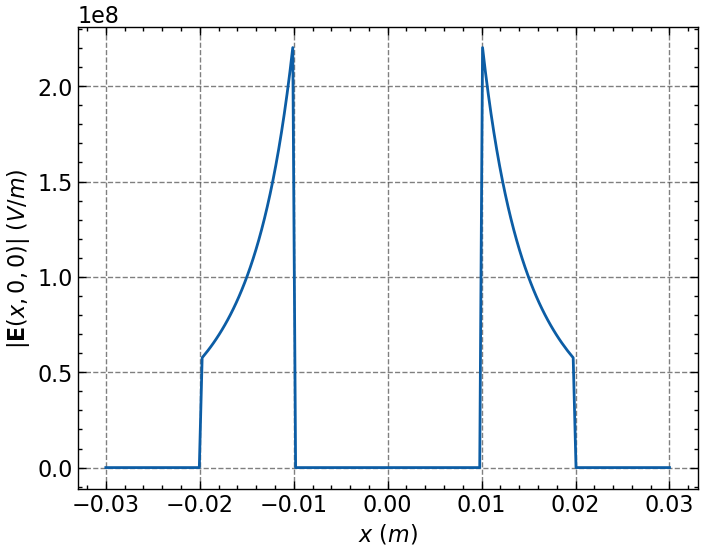

In [56]:
plt.plot(X, E_field)
plt.xlabel(r'$x~(m)$')
plt.ylabel(r'$|\mathbf{E}(x, 0, 0)|~(V/m)$')

### HW2: สนามไฟฟ้ารอบ ๆ ประจุแบบวงแหวน
จงเขียนฟังก์ชันที่ E(x, y, z) ใช้ในการคำนวณหาสนามไฟฟ้า $\mathbf{E(r)}$ รอบ ๆ ประจุแบบวงแหวนใน 3 มิติ ที่มีรัศมี $3~cm$ และมีประจุ $Q=1~nC$ 

![ring](https://i.stack.imgur.com/cbwYs.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp
from scipy.integrate import dblquad

In [13]:
x, y, z = smp.symbols('x, y, z', real=True)
phi = smp.symbols('phi', real=True, positive=True)

a = 3e-2

r = smp.Matrix([x, y, z])
rp = smp.Matrix([a * smp.cos(phi),\
                a * smp.sin(phi),\
                0.])

R = r - rp
R

Matrix([
[x - 0.03*cos(phi)],
[y - 0.03*sin(phi)],
[                z]])

In [16]:
Q = 1e-9
rho_l = Q / (2. * pi * a)
rho_l

5.3051647697298456e-09

In [19]:
dqdphi = rho_l * a

dEdphi = dqdphi / (4. * pi * epsilon_0) * R / R.norm()**3
dEdphi

Matrix([
[(1.43041329403279*x - 0.0429123988209837*cos(phi))/(z**2 + (x - 0.03*cos(phi))**2 + (y - 0.03*sin(phi))**2)**(3/2)],
[(1.43041329403279*y - 0.0429123988209837*sin(phi))/(z**2 + (x - 0.03*cos(phi))**2 + (y - 0.03*sin(phi))**2)**(3/2)],
[                                1.43041329403279*z/(z**2 + (x - 0.03*cos(phi))**2 + (y - 0.03*sin(phi))**2)**(3/2)]])

In [24]:
integrand_x = smp.lambdify([phi, x, y, z], dEdphi[0])
integrand_y = smp.lambdify([phi, x, y, z], dEdphi[1])
integrand_z = smp.lambdify([phi, x, y, z], dEdphi[2])

In [26]:
def E(x, y, z):
    Ex = quad(integrand_x, 0., 2. * pi, args=(x, y, z))[0]
    Ey = quad(integrand_y, 0., 2. * pi, args=(x, y, z))[0]
    Ez = quad(integrand_z, 0., 2. * pi, args=(x, y, z))[0]
    return np.array([Ex, Ey, Ez])

E(1, 2, 3)

array([0.17155484, 0.34310969, 0.51471416])

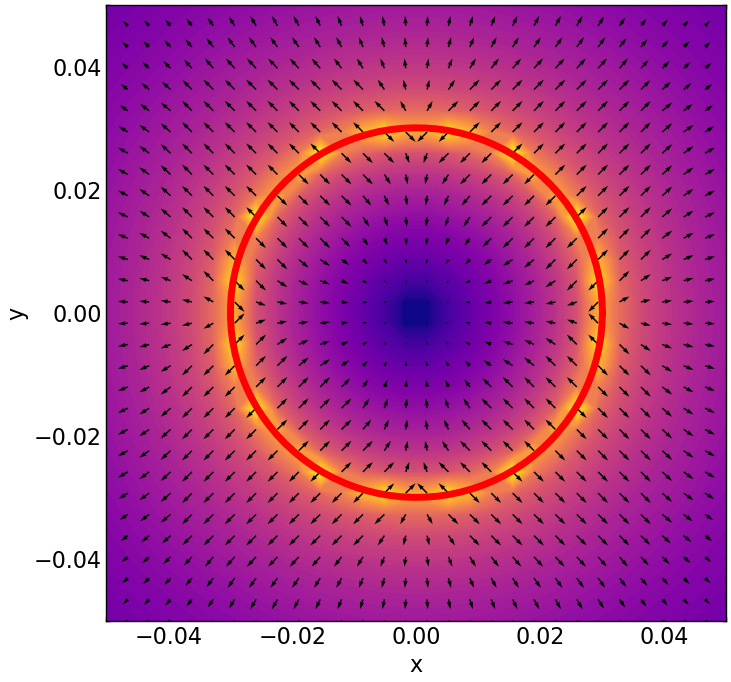

In [36]:
# 2D plot กรณี z = 0
def E2D(x, y):
    return E(x, y, 0.)[:2]

fig = plt.figure(figsize=[8, 8])
field_plot(E2D, x_min=-5e-2, x_max=5e-2, y_min=-5e-2, y_max=5e-2, num_grids=30, contour=True)

t = np.linspace(0, 2. * pi, 100)
X = 3e-2 * np.cos(t)
Y = 3e-2 * np.sin(t)
plt.plot(X, Y, color='r', linewidth=5)

Text(0, 0.5, 'z')

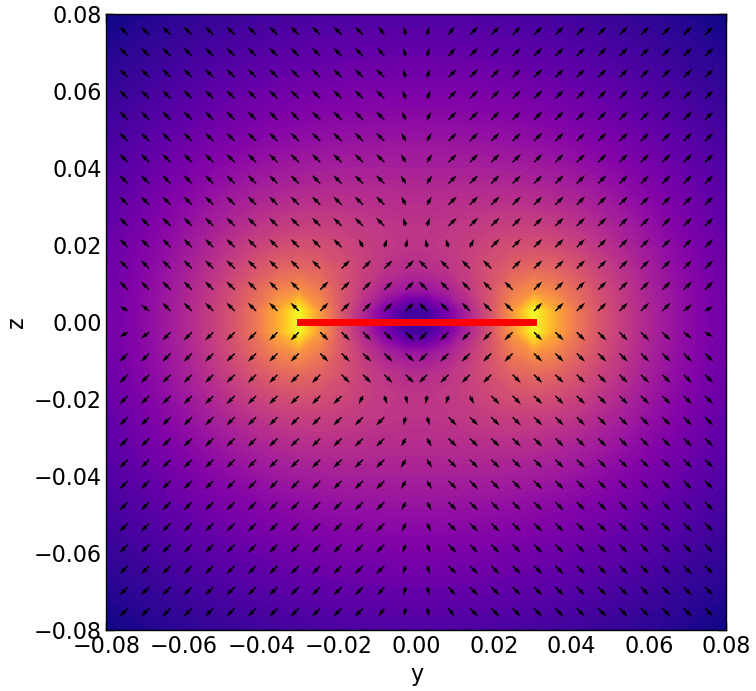

In [44]:
# 2D plot กรณี x = 0
def E2D(y, z):
    return E(0., y, z)[1:]

fig = plt.figure(figsize=[8, 8])
field_plot(E2D, x_min=-8e-2, x_max=8e-2, y_min=-8e-2, y_max=8e-2, num_grids=30, contour=True)

X = np.linspace(-3e-2, 3e-2, 100)
Y = np.zeros(len(X))
plt.plot(X, Y, color='r', linewidth=5)
plt.xlabel('y')
plt.ylabel('z')